In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression

In [7]:
data = pd.read_csv('nba_2020_advanced.csv')

In [8]:
data.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,C,26,OKC,63,1680,20.5,0.604,0.006,0.421,...,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1
1,Bam Adebayo,PF,22,MIA,72,2417,20.3,0.598,0.018,0.484,...,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3
2,LaMarcus Aldridge,C,34,SAS,53,1754,19.7,0.571,0.198,0.241,...,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5
3,Kyle Alexander,PF,23,MIA,2,13,4.7,0.500,0.000,0.000,...,33.3,10.2,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,591,8.9,0.473,0.500,0.139,...,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4


In [9]:
data

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Steven Adams,C,26,OKC,63,1680,20.5,0.604,0.006,0.421,...,14.2,17.3,3.8,2.7,6.5,0.185,1.9,1.1,2.9,2.1
1,Bam Adebayo,PF,22,MIA,72,2417,20.3,0.598,0.018,0.484,...,17.6,21.2,4.6,3.9,8.5,0.168,1.4,2.0,3.4,3.3
2,LaMarcus Aldridge,C,34,SAS,53,1754,19.7,0.571,0.198,0.241,...,7.8,23.4,3.0,1.4,4.5,0.122,1.8,-0.5,1.4,1.5
3,Kyle Alexander,PF,23,MIA,2,13,4.7,0.500,0.000,0.000,...,33.3,10.2,0.0,0.0,0.0,-0.003,-6.1,-3.5,-9.6,0.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,591,8.9,0.473,0.500,0.139,...,16.1,23.3,-0.7,0.4,-0.2,-0.020,-3.2,-1.4,-4.6,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Trae Young,PG,21,ATL,60,2120,23.9,0.595,0.455,0.448,...,16.2,34.9,5.3,0.6,5.9,0.133,6.2,-2.3,3.9,3.1
647,Cody Zeller,C,27,CHO,58,1341,18.8,0.576,0.157,0.374,...,11.9,20.8,2.3,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5
648,Tyler Zeller,C,30,SAS,2,4,22.4,0.250,0.000,0.000,...,0.0,43.2,0.0,0.0,0.0,-0.075,-0.3,-22.1,-22.4,0.0
649,Ante Žižić,C,23,CLE,22,221,16.4,0.597,0.000,0.264,...,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1


In [10]:
VORP_DATA = data.sort_values(by=['VORP'])
df = VORP_DATA[-10:]
VORP = df['VORP']
Player = df['Player']
VORP



488    3.5
99     3.7
373    5.1
162    5.4
177    5.4
334    5.5
376    5.9
319    6.1
12     6.6
257    7.3
Name: VORP, dtype: float64

In [11]:
MVPPTS = [26.0, 9.0, 168.0, 82.0, 200.0, 18.0, 23.0, 753.0, 962.0, 367.0]
MVPPOS = [7, 11, 5, 6, 4, 9, 8, 2, 1, 3]

In [12]:
df['MVPPTS'] = MVPPTS
df['MVPPOS'] = MVPPOS
df

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,MVPPTS,MVPPOS
488,Chris Paul,PG,34,OKC,70,2208,21.7,0.610,0.343,0.315,...,5.9,3.0,8.9,0.193,3.0,1.4,4.4,3.5,26.0,7
99,Jimmy Butler,SF,30,MIA,58,1959,23.6,0.585,0.157,0.693,...,6.3,2.7,9.0,0.221,4.0,1.5,5.4,3.7,9.0,11
373,Kawhi Leonard,SF,28,LAC,57,1848,26.9,0.589,0.287,0.355,...,5.4,3.3,8.7,0.226,6.5,2.4,8.9,5.1,168.0,5
162,Anthony Davis,PF,26,LAL,62,2131,27.4,0.610,0.199,0.479,...,6.7,4.4,11.1,0.250,5.4,2.6,8.0,5.4,82.0,6
177,Luka Dončić,PG,20,DAL,61,2047,27.6,0.585,0.431,0.448,...,6.5,2.3,8.8,0.207,7.4,1.0,8.4,5.4,200.0,4
334,Nikola Jokić,C,24,DEN,73,2336,24.9,0.605,0.238,0.281,...,6.7,3.1,9.8,0.202,5.5,2.0,7.4,5.5,18.0,9
376,Damian Lillard,PG,29,POR,66,2474,26.9,0.627,0.500,0.384,...,10.9,0.7,11.6,0.225,8.3,-0.9,7.5,5.9,23.0,8
319,LeBron James,PG,35,LAL,67,2316,25.5,0.577,0.326,0.292,...,6.2,3.6,9.8,0.204,6.6,1.8,8.4,6.1,753.0,2
12,Giannis Antetokounmpo,PF,25,MIL,63,1917,31.9,0.613,0.237,0.508,...,6.1,5.0,11.1,0.279,7.4,4.1,11.5,6.6,962.0,1
257,James Harden,SG,30,HOU,68,2483,29.1,0.626,0.557,0.528,...,9.9,3.2,13.1,0.254,8.1,1.6,9.6,7.3,367.0,3


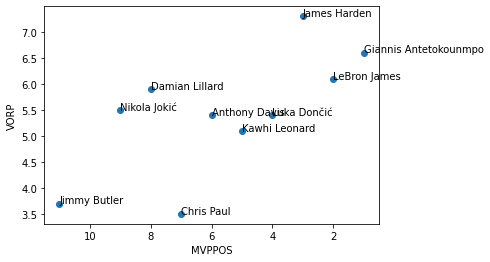

In [19]:
fig, ax = plt.subplots()


ax.scatter(x=df['MVPPOS'], y=df['VORP'])
ax.set_xlabel('MVPPOS')
ax.set_ylabel('VORP')
ax.invert_xaxis()


for idx, row in df.iterrows():
    ax.annotate(row['Player'], (row['MVPPOS'], row['VORP']) )
    


In [23]:
x= df['MVPPOS']
y= df['VORP']

x = np.array(x).reshape(-1,1)     
y = np.array(y).reshape(-1,1)    

model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [24]:
r2 = round(model.score(x,y), 2)            
predicted_y = model.predict(x)    

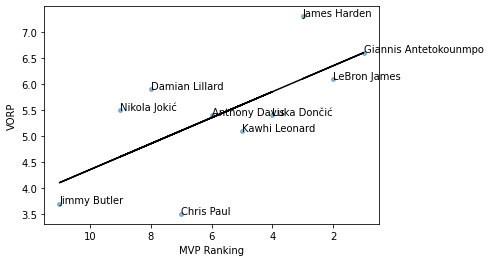

In [37]:
fig, ax = plt.subplots()
ax.scatter(x, y, s=15, alpha=.5)                            
ax.plot(x, predicted_y, color = 'black')                            
ax.set_xlabel('MVP Ranking')                                  
ax.set_ylabel('VORP')    
ax.invert_xaxis()

for idx, row in df.iterrows():
    ax.annotate(row['Player'], (row['MVPPOS'], row['VORP']) )

Text(10, 25, 'R2=0.47')

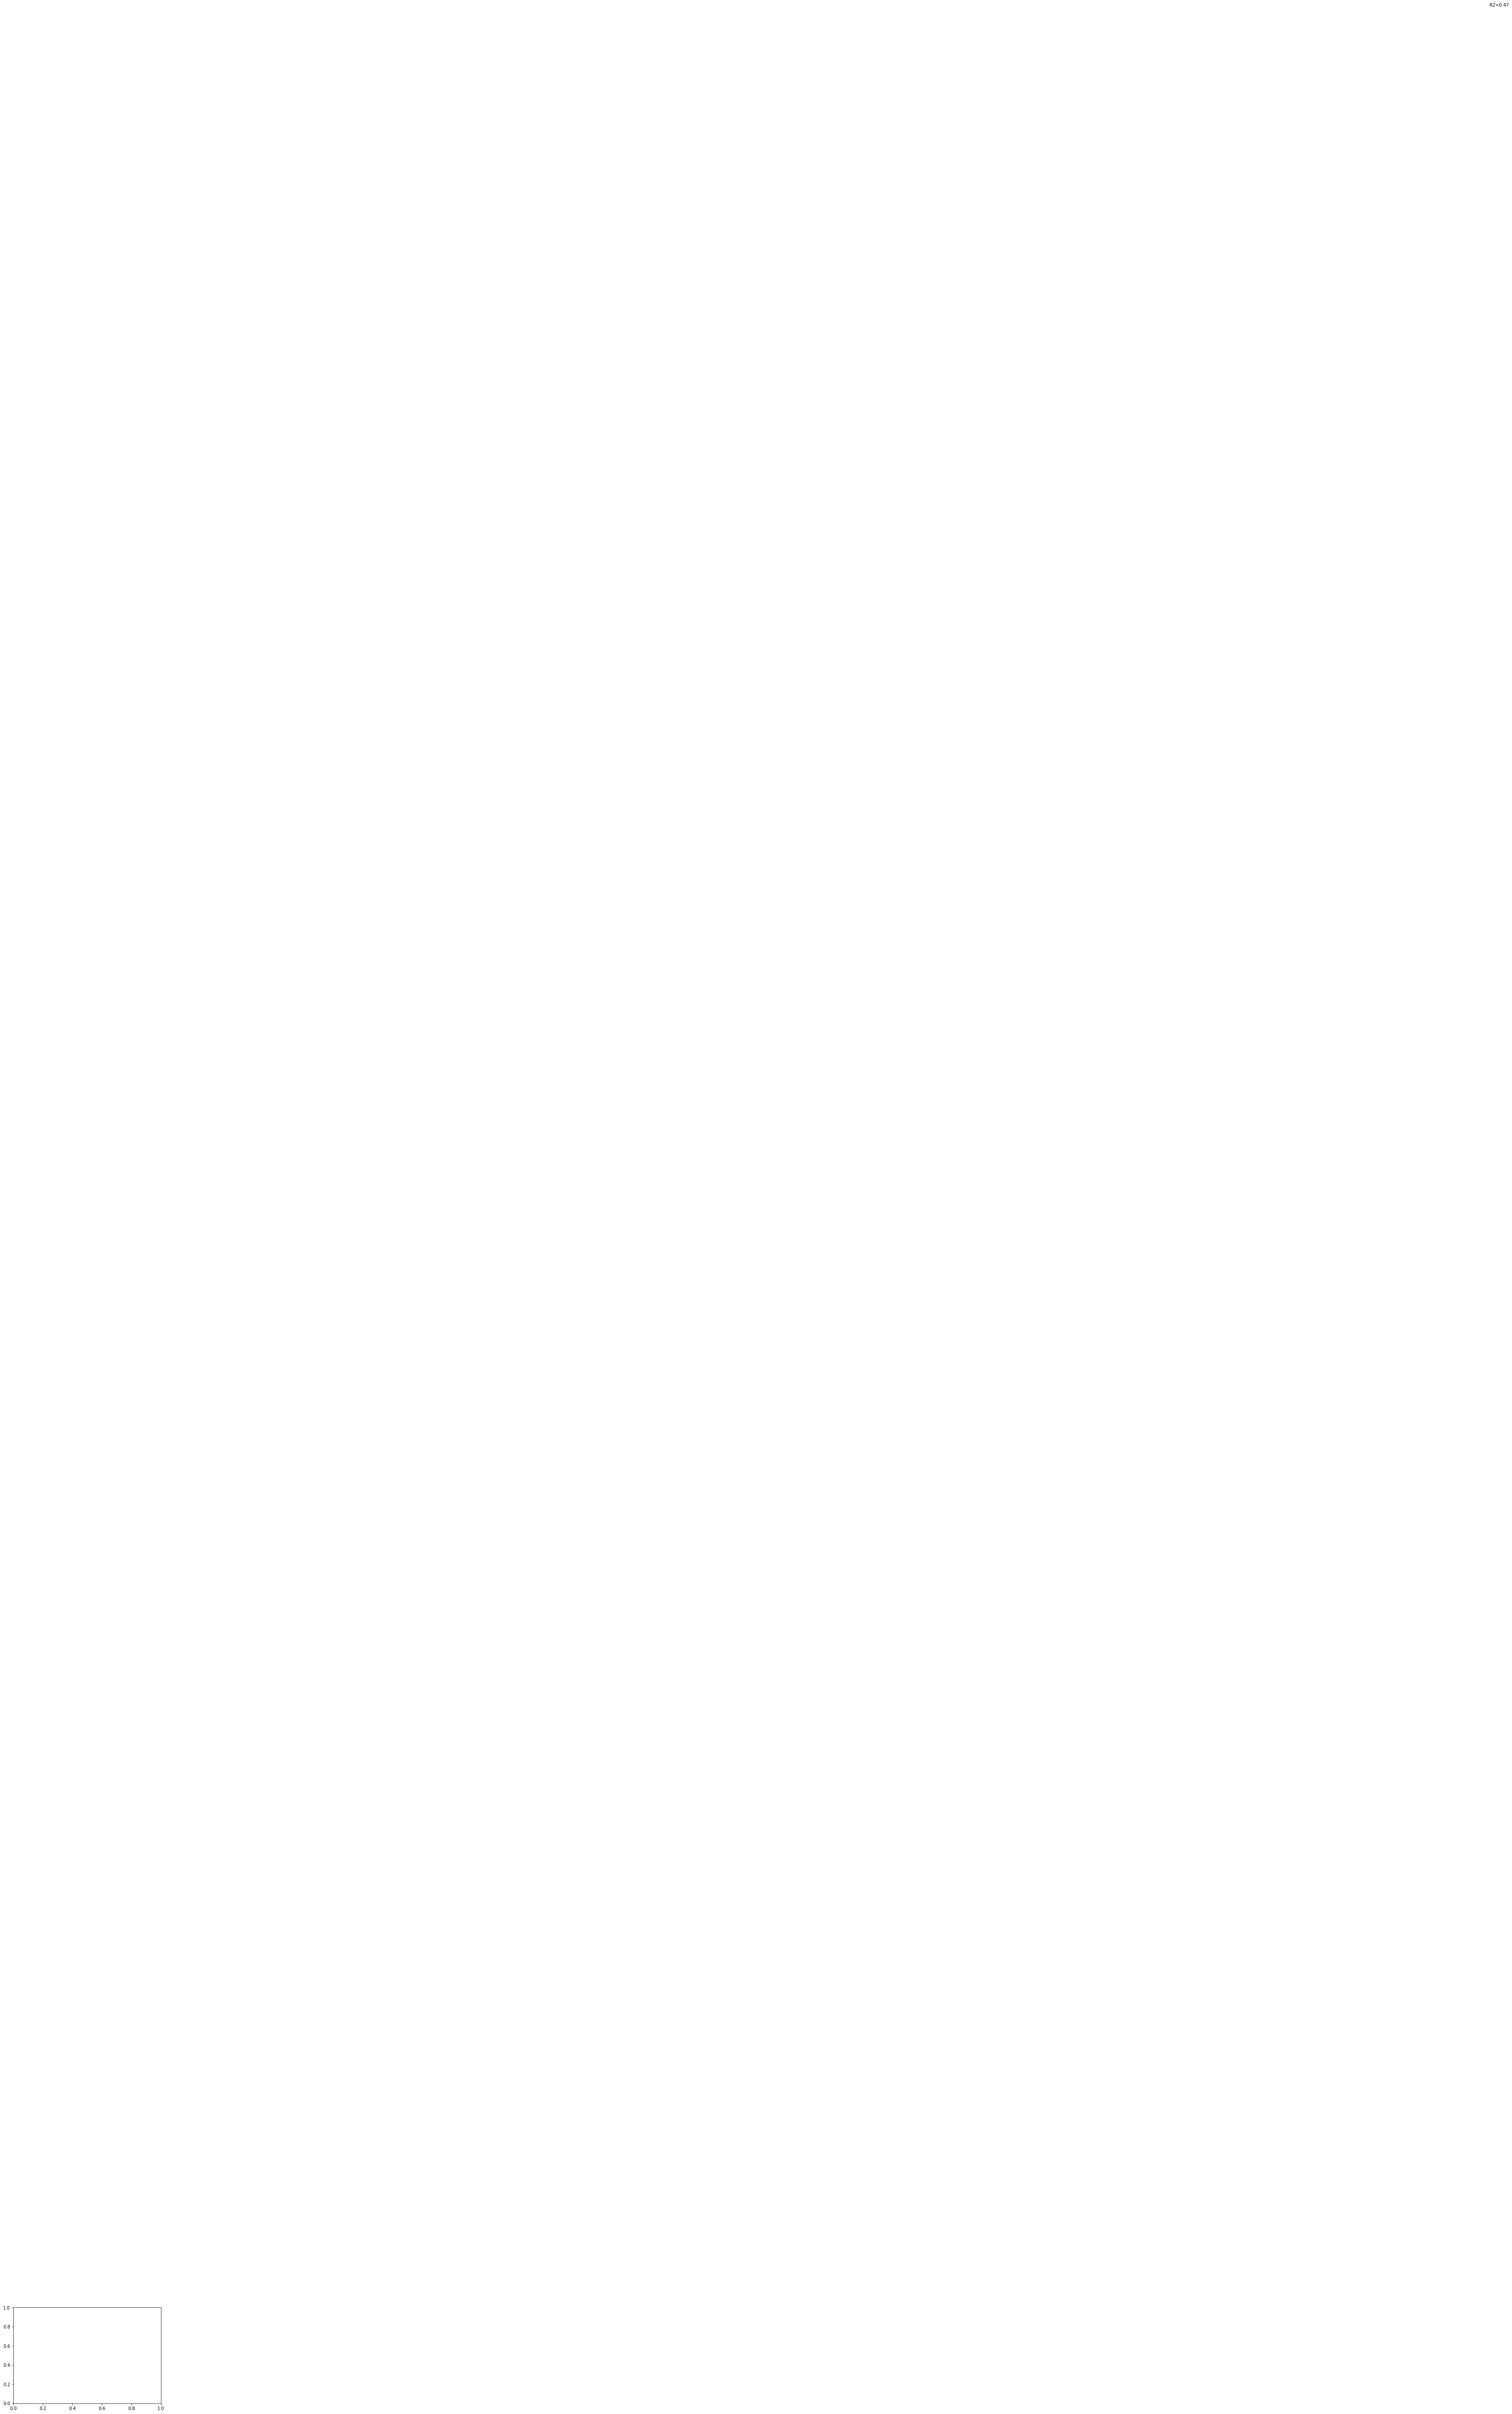

In [33]:
plt.text(10,25, f'R2={r2}')